In [1]:
import pandas as pd
import json
from config import *
from ppp_prediction.utils import load_data
from ppp_prediction.model import fit_best_model
import pickle


import matplotlib.pyplot as plt
import seaborn as sns
from ppp_prediction.plot.utils import save_fig

params = {
    "axes.labelsize": 14,  # fontsize for x and y labels (was 10)
    "font.size": 8,  # was 10
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "text.usetex": False,
    "figure.figsize": [5, 5],
    "font.family": "Calibri",
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.linewidth": 2,
    # set title fontsize
    "axes.titlesize": 15,
    "axes.titleweight": "bold",
    "figure.titlesize": 15,
    # label
    "axes.labelweight": "bold",
}

plt.rcParams.update(params)

%config InlineBackend.figure_format = "svg"
%config InlineBackend.print_figure_kwargs = {"dpi" : 300}



/deeplearning/xutingfeng/miniforge3/envs/ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
2025-02-13 11:17:39,133	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-13 11:17:39,306	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-13 11:17:39,411	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
diseaserawDir = dataDir / "label"
modelSaveDir = outputDir / "0x-tabpfn"


def get_predict_v2_from_df(
    model,
    data,
    x_var,
):
    """
    merge by idx
    """

    no_na_data = data[x_var].dropna().copy()
    if hasattr(model, "predict_proba"):
        no_na_data["pred"] = model.predict_proba(no_na_data)[:, 1]
    else:
        no_na_data["pred"] = model.predict(no_na_data)

    return (
        data[[]]
        .merge(no_na_data[["pred"]], left_index=True, right_index=True, how="left")
        .values.flatten()
    )

In [3]:
clinical_risk_dict = json.loads(open(dataDir / "clinical_risk_dict.json").read())
clinical_risk_dict["AgeSex"] = ["age", "sex"]
clinical_risk_dict

{'ASCVD': ['age',
  'sex',
  'cholesterol',
  'hdl_cholesterol',
  'systolic_blood_pressure_medical_adjust',
  'antihypertensives',
  'diabetes2',
  'smoking_status'],
 'FINDRISC': ['age',
  'sex',
  'daily_physical_activity',
  'fh_diabetes',
  'body_mass_index_bmi',
  'waist_circumference',
  'antihypertensives'],
 'CAIDE': ['age',
  'sex',
  'daily_physical_activity',
  'education_years',
  'body_mass_index_bmi',
  'cholesterol'],
 'PANEL': ['body_mass_index_bmi',
  'waist_hip_ratio',
  'waist_circumference',
  'weight',
  'standing_height',
  'systolic_blood_pressure_medical_adjust',
  'cholesterol',
  'ldl_direct_medical_adjust',
  'hdl_cholesterol',
  'triglycerides_medical_adjust',
  'glucose',
  'glycated_haemoglobin_hba1c',
  'creatinine',
  'cystatin_c',
  'urea',
  'urate',
  'aspartate_aminotransferase',
  'alanine_aminotransferase',
  'alkaline_phosphatase',
  'albumin',
  'creactive_protein',
  'red_blood_cell_erythrocyte_count',
  'white_blood_cell_leukocyte_count',
  'p

In [4]:
# Prot_train = load_data(dataDir / "imputeData" / "Prot_train.feather")
# held_out_train = load_data(dataDir / "imputeData" / "held_out_train.feather")
# held_out_test = load_data(dataDir / "imputeData" / "held_out_test.feather")
# print(RF_train.info())

RF_train = load_data(dataDir / "imputeData" / "RF_train.feather")
held_out_train = load_data(dataDir / "imputeData" / "held_out_train.feather")
held_out_test = load_data(dataDir / "imputeData" / "held_out_test.feather")
print(RF_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473367 entries, 0 to 473366
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   eid                                         473367 non-null  object 
 1   age                                         473367 non-null  Float64
 2   sex                                         473367 non-null  Int64  
 3   smoking_status                              473367 non-null  Int64  
 4   alcohol_intake_frequency                    473367 non-null  Int64  
 5   daily_physical_activity                     473367 non-null  Int64  
 6   education_years                             473367 non-null  float64
 7   daily_healthy_food                          473367 non-null  Int64  
 8   fh_diabetes                                 473367 non-null  Int64  
 9   diabetes2                                   473367 non-null  Int64  
 

## Clinical Model 

In [5]:
RF_train = load_data(dataDir / "imputeData" / "RF_train.feather")
held_out_train = load_data(dataDir / "imputeData" / "held_out_train.feather")
held_out_test = load_data(dataDir / "imputeData" / "held_out_test.feather")
print(RF_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473367 entries, 0 to 473366
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   eid                                         473367 non-null  object 
 1   age                                         473367 non-null  Float64
 2   sex                                         473367 non-null  Int64  
 3   smoking_status                              473367 non-null  Int64  
 4   alcohol_intake_frequency                    473367 non-null  Int64  
 5   daily_physical_activity                     473367 non-null  Int64  
 6   education_years                             473367 non-null  float64
 7   daily_healthy_food                          473367 non-null  Int64  
 8   fh_diabetes                                 473367 non-null  Int64  
 9   diabetes2                                   473367 non-null  Int64  
 

In [6]:
dataDir

PosixPath('V4/data')

In [7]:
print(RF_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473367 entries, 0 to 473366
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   eid                                         473367 non-null  object 
 1   age                                         473367 non-null  Float64
 2   sex                                         473367 non-null  Int64  
 3   smoking_status                              473367 non-null  Int64  
 4   alcohol_intake_frequency                    473367 non-null  Int64  
 5   daily_physical_activity                     473367 non-null  Int64  
 6   education_years                             473367 non-null  float64
 7   daily_healthy_food                          473367 non-null  Int64  
 8   fh_diabetes                                 473367 non-null  Int64  
 9   diabetes2                                   473367 non-null  Int64  
 

In [8]:



def get_predict_v2_from_df(
    model,
    data,
    x_var,
):
    """
    merge by idx
    """

    no_na_data = data[x_var].dropna().copy()
    if hasattr(model, "predict_proba"):
        no_na_data["pred"] = model.predict_proba(no_na_data)[:, 1]
    else:
        no_na_data["pred"] = model.predict(no_na_data)

    return (
        data[[]]
        .merge(no_na_data[["pred"]], left_index=True, right_index=True, how="left")
        .values.flatten()
    )

In [9]:
drop_dict = {
    "T2D": ["Glucose", "glucose", "glycated_haemoglobin_hba1c"],
    "Stroke": None,
    "Heart_Failure": None,
    "Coronary_Artery_Disease": None,
    "Chronic_kidney_disease": ["Creatinine", "creatinine"],
    "Atrial_fibrillation_or_flutter": None,
    "PAD": None,
    "Hypertension": None,
    "Venous_Thromboembolism": None,
    "CMD": ["Creatinine", "creatinine", "Glucose", "glucose"],
}


def drop_value_from_list(l, v=None):
    if v is None:
        return l
    if len(v) == 0:
        return l
    will_drop = []
    will_keep = []
    for i in l:
        if i in v:
            will_drop.append(i)
        else:
            will_keep.append(i)
    print(f"will drop {will_drop}")
    return will_keep
    # will_drop.extend(drop_dict[i])

In [10]:
list(diseaserawDir.glob("*"))

[PosixPath('V4/data/label/Coronary_Artery_Disease.feather'),
 PosixPath('V4/data/label/Heart_Failure.feather'),
 PosixPath('V4/data/label/Hypertension.feather'),
 PosixPath('V4/data/label/Stroke.feather'),
 PosixPath('V4/data/label/Atrial_fibrillation_or_flutter.feather'),
 PosixPath('V4/data/label/Chronic_kidney_disease.feather'),
 PosixPath('V4/data/label/PAD.feather'),
 PosixPath('V4/data/label/Venous_Thromboembolism.feather'),
 PosixPath('V4/data/label/T2D.feather')]

In [11]:
from ppp_prediction.model_v2.models import (
    fit_best_model_v2,
    fit_ensemble_model_simple_v2,
    fit_lightgbm,
    fit_xgboost,
)

In [12]:
from collections import defaultdict
from ppp_prediction.cox import run_cox

# from ppp_prediction.model import run_glmnet
E = "incident"
T = "survTime"
disease_dict = defaultdict(dict)
for disease_dir in diseaserawDir.glob("*"):
    disease_name = disease_dir.stem


    disease_df = load_data(disease_dir)

    disease_train = disease_df.merge(RF_train, on="eid", how="inner")
    disease_data_held_out_train = disease_df.merge(
        held_out_train, on="eid", how="inner"
    )
    disease_data_held_out_test = disease_df.merge(held_out_test, on="eid", how="inner")

    disease_modelSaveDir = modelSaveDir / disease_name
    disease_modelSaveDir.mkdir(parents=True, exist_ok=True)
    if (disease_modelSaveDir / "metrics.csv").exists():
        print(f"{disease_name} already exists")
        continue
        # c_disease_dict = pickle.load(
        #     open(disease_modelSaveDir / "disease_dict.pkl", "rb")
        # )
    else:
        final_need_cols = ["eid", "incident", "survTime", "date"]
        c_model_dict = {}

        # for name, combination in clinical_risk_dict.items():
        name = "PANEL"
        combination = clinical_risk_dict[name]

        # split data 

        # 1) full data ; 2) random sample data 
        n_case_train = disease_train["incident"].sum()
    
        disease_train = disease_train.dropna(subset=["incident", *combination])
        disease_train_case = disease_train.query("incident == 1").sample(n=5000 if n_case_train > 5000 else n_case_train)
        disease_train_control = disease_train.query("incident == 0").sample(n=5000)
        disease_train_sample = pd.concat([disease_train_case, disease_train_control])
        X_train = disease_train_sample[combination]
        y_train = disease_train_sample["incident"]
        
        disease_data_held_out_train = disease_data_held_out_train.dropna(
            subset=["incident", *combination]
        )
        X_held_out_train = disease_data_held_out_train[combination]
        y_held_out_train = disease_data_held_out_train["incident"]

        disease_data_held_out_test = disease_data_held_out_test.dropna(
            subset=["incident", *combination]
        )
        X_held_out_test = disease_data_held_out_test[combination]
        y_held_out_test = disease_data_held_out_test["incident"]


        # Test model; 1) xgboost; 2) lasso  ;3) AutoTabPFN

        ## 1) Lasso full  
        
        (lasso_full, *_) = fit_best_model(
            train_df=disease_train,
            test_df=disease_data_held_out_test,
            X_var=combination,
            y_var="incident",
            method_list="Lasso",
            cv=3,
            engine="cuml",
        )
        
        disease_data_held_out_test["lasso_full"] = get_predict_v2_from_df(
            lasso_full, disease_data_held_out_test, combination
        )

        pickle.dump(
            lasso_full, open(disease_modelSaveDir / "lasso_full.pkl", "wb")
        )
        del lasso_full
        
        (lasso_sample, *_) = fit_best_model(
                       train_df=disease_train_sample,
            test_df=disease_data_held_out_test,
            X_var=combination,
            y_var="incident",
            method_list="Lasso",
            cv=3,
            engine="cuml",
        )


        disease_data_held_out_test["lasso_sample"] = get_predict_v2_from_df(
                        lasso_sample, disease_data_held_out_test, combination
        )
        pickle.dump(
            lasso_sample, open(disease_modelSaveDir / "lasso_sample.pkl", "wb")
        )
        del lasso_sample
        
        from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier
        
        AutoTabPFN = AutoTabPFNClassifier(max_time=120, device='cuda') # 120 seconds tuning time
        AutoTabPFN.fit(X_train, y_train)

        disease_data_held_out_test["AutoTabPFN"] = AutoTabPFN.predict_proba(X_held_out_test)[:, 1]

        pickle.dump(
            AutoTabPFN, open(disease_modelSaveDir / "AutoTabPFN.pkl", "wb")
        )

        del AutoTabPFN


        # xgboost sampled
        xgboost_sample_tuned, *_ = fit_xgboost(
        train = disease_train_sample,
        xvar = combination,
        label= "incident",
        tuning= True,
        tune_config = {"max_iter": 100}
    )
        disease_data_held_out_test["xgboost_sample"] = get_predict_v2_from_df(
            xgboost_sample_tuned, disease_data_held_out_test, combination
        )
        pickle.dump(
            xgboost_sample_tuned, open(disease_modelSaveDir / "xgboost_sample.pkl", "wb")
        )
        del xgboost_sample_tuned

        # xgboost full
        xgboost_full_tuned, *_ = fit_xgboost(
            train = disease_train,
            xvar = combination,
            label = "incident",
            tuning = True,
            tune_config = {"max_iter": 100}
        )

        disease_data_held_out_test["xgboost_full"] = get_predict_v2_from_df(
            xgboost_full_tuned, disease_data_held_out_test, combination
        )
        pickle.dump(
            xgboost_full_tuned, open(disease_modelSaveDir / "xgboost_full.pkl", "wb")
        )
        del xgboost_full_tuned


        held_out_test_df_to_save = disease_data_held_out_test[["eid", "incident", "survTime", "date", "lasso_full", "lasso_sample", "AutoTabPFN"]].reset_index(drop=True)
        held_out_test_df_to_save.to_feather(disease_modelSaveDir / "held_out_test.feather")
        from ppp_prediction.metrics import cal_binary_metrics
        metrics_list = [] 
        for key in [ "lasso_full", "lasso_sample", "AutoTabPFN", "xgboost_full", "xgboost_sample"]:
            to_cal_df = disease_data_held_out_test[["eid", E, T, key]].copy().dropna()
            res = cal_binary_metrics(to_cal_df["incident"], to_cal_df[key], n_resamples= 30, ci = True)
            # res = run_cox(to_cal_df, var=key, E=E, T=T, ci=True, n_resamples=100)
            res["disease"] = disease_name
            res["method"] = key
            metrics_list.append(res)
        metrics_df = pd.DataFrame(metrics_list)
        metrics_df.to_csv(disease_modelSaveDir / "metrics.csv", index=False)
        

(train_xgboost pid=2016152) [01:03:21] WARNING: /croot/xgboost-split_1724073744422/work/src/learner.cc:740: 
(train_xgboost pid=2016152) Parameters: { "class_weight", "n_estimators" } are not used.
(train_xgboost pid=2016152) 
(train_xgboost pid=2016151) 
(train_xgboost pid=2016156) 
(train_xgboost pid=2016147) 
(train_xgboost pid=2016155) 
(train_xgboost pid=2016149) 
(train_xgboost pid=2016148) 
(train_xgboost pid=2016150) 
(train_xgboost pid=2016153) 
(train_xgboost pid=2016154) 
(train_xgboost pid=2016151) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/home/xutingfeng/ray_results/train_xgboost_2025-02-13_01-03-17/train_xgboost_41025_00004_4_eta=0.0055,gamma=0.2219,max_depth=10,min_child_weight=1,n_estimators=991,reg_alpha=0.0342,reg_lambda=0_2025-02-13_01-03-17/checkpoint_000000)
(train_xgboost pid=2016151) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/home/xutingfeng/ray_results/train_xgboost_2025-02-13_01-03-17/train_xgboost_41025_

In [13]:
metrics_list

[{'AUC': 0.9066512197909156,
  'AUC_UCI': 0.9157310743088545,
  'AUC_LCI': 0.897229378986544,
  'ACC': 0.8315819572521267,
  'ACC_UCI': 0.8360032882979483,
  'ACC_LCI': 0.827253556365716,
  'Macro_F1': 0.6531860876701393,
  'Macro_F1_UCI': 0.6582872955498453,
  'Macro_F1_LCI': 0.6459383607842545,
  'Sensitivity': 0.8205128204286654,
  'Sensitivity_UCI': 0.8342474641346974,
  'Sensitivity_LCI': 0.7999124614953366,
  'Specificity': 0.8324112494173013,
  'Specificity_UCI': 0.8357427782350608,
  'Specificity_LCI': 0.826828769012072,
  'APR': 0.5383391317411502,
  'APR_UCI': 0.5668630560121634,
  'APR_LCI': 0.4988839531481368,
  'N': 13989,
  'N_case': 975.0,
  'N_control': 13014.0,
  'disease': 'T2D',
  'method': 'lasso_full'},
 {'AUC': 0.8845434305461969,
  'AUC_UCI': 0.894484453370205,
  'AUC_LCI': 0.8746874698673996,
  'ACC': 0.8320108656801772,
  'ACC_UCI': 0.8384016012581313,
  'ACC_LCI': 0.8261759239402386,
  'Macro_F1': 0.646877055678257,
  'Macro_F1_UCI': 0.6577744238512522,
  'Mac

In [46]:
model, *_ = fit_xgboost(
    train = disease_train,
    xvar = combination,
    label= "incident",
    tuning= True,
    tune_config = {"max_iter": 10}
)




(train_xgboost pid=1693012) [21:10:42] WARNING: /croot/xgboost-split_1724073744422/work/src/learner.cc:740: 
(train_xgboost pid=1693012) Parameters: { "class_weight", "n_estimators" } are not used.
(train_xgboost pid=1693012) 
(train_xgboost pid=1693011) 
(train_xgboost pid=1693010) 
(train_xgboost pid=1693014) 
(train_xgboost pid=1693016) 
(train_xgboost pid=1693018) 
(train_xgboost pid=1693013) 
(train_xgboost pid=1693017) 
(train_xgboost pid=1693019) 
(train_xgboost pid=1693015) 
(train_xgboost pid=1693010) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/home/xutingfeng/ray_results/train_xgboost_2025-02-12_21-10-39/train_xgboost_c13d8_00000_0_eta=0.0019,gamma=0.4854,max_depth=10,min_child_weight=2,n_estimators=178,reg_alpha=0.0430,reg_lambda=0_2025-02-12_21-10-39/checkpoint_000000)
(train_xgboost pid=1693010) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/home/xutingfeng/ray_results/train_xgboost_2025-02-12_21-10-39/train_xgboost_c13d8_

In [47]:
pred = get_predict_v2_from_df(model, disease_data_held_out_test, combination)
cal_binary_metrics(disease_data_held_out_test["incident"], pred, n_resamples=30, ci=True)



{'AUC': 0.708167431125318,
 'AUC_UCI': 0.7157560718845242,
 'AUC_LCI': 0.6978425727207654,
 'ACC': 0.6063262473518883,
 'ACC_UCI': 0.614212141135218,
 'ACC_LCI': 0.5993553217912192,
 'Macro_F1': 0.48269992164142644,
 'Macro_F1_UCI': 0.49220368552007004,
 'Macro_F1_LCI': 0.47654037055892046,
 'Sensitivity': 0.7165775400430857,
 'Sensitivity_UCI': 0.7392280184092433,
 'Sensitivity_LCI': 0.6906438315869509,
 'Specificity': 0.5964828519089959,
 'Specificity_UCI': 0.6037033919260507,
 'Specificity_LCI': 0.5892112566747311,
 'APR': 0.18128425056799646,
 'APR_UCI': 0.19932729248818665,
 'APR_LCI': 0.1669082023816276,
 'N': 13689,
 'N_case': 1122.0,
 'N_control': 12567.0}

In [28]:
from ppp_prediction.metrics import cal_binary_metrics
metrics_list = [] 
for key in [ "lasso_full", "lasso_sample", "AutoTabPFN"]:
    to_cal_df = disease_data_held_out_test[["eid", E, T, key]].copy().dropna()
    res = cal_binary_metrics(to_cal_df["incident"], to_cal_df[key], n_resamples= 30, ci = True)
    # res = run_cox(to_cal_df, var=key, E=E, T=T, ci=True, n_resamples=100)
    res["disease"] = disease_name
    res["method"] = key
    metrics_list.append(res)
metrics_df = pd.DataFrame(metrics_list)
metrics_df

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,...,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI,N,N_case,N_control,disease,method
0,0.720981,0.732224,0.710485,0.633209,0.638472,0.625444,0.498329,0.507207,0.490009,0.699643,...,0.634553,0.621690,0.193396,0.206715,0.176514,13689,1122.0,12567.0,Coronary_Artery_Disease,lasso_full
1,0.720981,0.733084,0.702641,0.633209,0.643093,0.624229,0.498329,0.509365,0.492687,0.699643,...,0.637406,0.623150,0.193396,0.205430,0.175484,13689,1122.0,12567.0,Coronary_Artery_Disease,lasso_sample
2,0.721760,0.733895,0.713559,0.626781,0.632406,0.621479,0.495956,0.502919,0.488075,0.715686,...,0.623216,0.611917,0.190091,0.207808,0.172352,13689,1122.0,12567.0,Coronary_Artery_Disease,AutoTabPFN


In [20]:
metrics_list = [] 
for key in [ "lasso_full", "lasso_sample", "AutoTabPFN"]:
    to_cal_df = disease_data_held_out_test[["eid", E, T, key]].copy().dropna()

    res = run_cox(to_cal_df, var=key, E=E, T=T, ci=True, n_resamples=100)
    res["disease"] = disease_name
    res["method"] = key
    metrics_list.append(res)
metrics_df = pd.concat(metrics_list)

Running Cox for ['lasso_full'] with [] and []
Index(['lasso_full', 'incident', 'survTime'], dtype='object')
a_lasso_full
Running Cox for ['lasso_sample'] with [] and []
Index(['lasso_sample', 'incident', 'survTime'], dtype='object')
a_lasso_sample
Running Cox for ['AutoTabPFN'] with [] and []
Index(['AutoTabPFN', 'incident', 'survTime'], dtype='object')
a_AutoTabPFN


In [24]:
disease_data_held_out_test

,eid,event,incident,prevalent,survTime,date,recuit_date,followTime,event_age,A1BG,...,antihypertensives,PhysicalActivity,HealthyDiet,Alcohol consumption,Sedentary_behaviour,Sleep_duration,RT_init,lasso_full,lasso_sample,AutoTabPFN
0,1000127,0.0,0.0,0.0,15.224658,NaT,2008-10-14,15.224658,62.041096,-9.166130e-01,...,0,1,1,1,1,1,567.0,0.026237,0.026237,0.209537
1,1000149,0.0,0.0,0.0,15.260274,NaT,2008-10-01,15.260274,70.046575,-7.444882e-18,...,0,0,0,1,0,1,617.0,0.034087,0.034087,0.190879
2,1000957,0.0,0.0,0.0,15.126027,NaT,2008-11-19,15.126027,75.049315,4.882265e-01,...,0,1,0,1,1,1,610.0,0.080916,0.080916,0.441093
3,1001009,0.0,0.0,0.0,15.569863,NaT,2008-06-10,15.569863,69.046575,2.103653e-01,...,0,1,1,1,1,1,668.0,-0.016255,-0.016255,0.088044
4,1001289,0.0,0.0,0.0,14.183562,NaT,2009-10-29,14.183562,65.043836,-1.327492e+00,...,0,0,1,1,1,1,613.0,0.004398,0.004398,0.068952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14433,6023377,0.0,0.0,0.0,15.471233,NaT,2008-07-16,15.471233,70.046575,-7.444882e-18,...,0,0,0,1,1,1,492.0,0.075481,0.075481,0.369361
14434,6023681,0.0,0.0,0.0,14.569863,NaT,2009-06-10,14.569863,64.043836,-4.777400e-01,...,0,1,1,1,1,0,536.0,-0.063209,-0.063209,0.054667
14436,6024020,0.0,0.0,0.0,16.104110,NaT,2007-11-28,16.104110,65.043836,-2.211754e-01,...,0,0,1,1,1,1,403.0,0.001761,0.001761,0.195260
14437,6024098,0.0,0.0,0.0,13.917808,NaT,2010-02-03,13.917808,83.054795,-5.503899e-01,...,0,0,1,1,1,1,637.0,0.232859,0.232859,0.858585


In [23]:
metrics_df[['var', 'c_index', 'c_index_LCI', 'c_index_UCI', 'c_index (95% CI)',
       'AIC', 'n_control', 'n_case', 'exposure', 'fit_params', 'disease',
       'method']]

,var,c_index,c_index_LCI,c_index_UCI,c_index (95% CI),AIC,n_control,n_case,exposure,fit_params,disease,method
0,lasso_full,0.720068,0.708176,0.732983,0.72 (0.71-0.73,20527.143014,12567,1122,incident,NaN,Coronary_Artery_Disease,lasso_full
0,lasso_sample,0.720068,0.707149,0.732667,0.72 (0.71-0.73,20527.143014,12567,1122,incident,NaN,Coronary_Artery_Disease,lasso_sample
0,AutoTabPFN,0.720678,0.710014,0.735057,0.72 (0.71-0.74,20466.574681,12567,1122,incident,NaN,Coronary_Artery_Disease,AutoTabPFN


In [21]:
metrics_df

,var,HR (95% CI),pvalue,coef,HR,se(coef),coef lower 95%,coef upper 95%,HR_LCI,HR_UCI,...,c_index_LCI,c_index_UCI,c_index (95% CI),AIC,n_control,n_case,exposure,fit_params,disease,method
0,lasso_full,23299.82 (12026.06-45142.07),3.736083e-195,10.056201,23299.816036,0.337439,9.394832,10.717570,12026.063769,45142.071231,...,0.708176,0.732983,0.72 (0.71-0.73,20527.143014,12567,1122,incident,NaN,Coronary_Artery_Disease,lasso_full
0,lasso_sample,23299.82 (12026.06-45142.07),3.736083e-195,10.056201,23299.816036,0.337439,9.394832,10.717570,12026.063769,45142.071231,...,0.707149,0.732667,0.72 (0.71-0.73,20527.143014,12567,1122,incident,NaN,Coronary_Artery_Disease,lasso_sample
0,AutoTabPFN,53.20 (39.10-72.39),3.403802e-141,3.974101,53.202284,0.157095,3.666201,4.282001,39.103087,72.385155,...,0.710014,0.735057,0.72 (0.71-0.74,20466.574681,12567,1122,incident,NaN,Coronary_Artery_Disease,AutoTabPFN


## compare

In [4]:
import pandas as pd
from pathlib import Path



In [9]:
res_df = pd.concat([pd.read_csv(i) for i in list(modelSaveDir.rglob("metrics.csv"))])
res_df

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,...,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI,N,N_case,N_control,disease,method
0,0.808887,0.822803,0.781174,0.699107,0.704062,0.691094,0.450705,0.458036,0.444574,0.777311,...,0.708080,0.688430,0.092840,0.116255,0.061184,13892,238.0,13654.0,Heart_Failure,lasso_full
1,0.802015,0.835717,0.769531,0.785920,0.792098,0.776553,0.488928,0.496641,0.480684,0.689076,...,0.793846,0.780400,0.099841,0.119605,0.081985,13892,238.0,13654.0,Heart_Failure,lasso_sample
2,0.808701,0.833931,0.788811,0.727325,0.733111,0.719038,0.463689,0.468948,0.458012,0.764706,...,0.734562,0.719841,0.117968,0.134507,0.085084,13892,238.0,13654.0,Heart_Failure,AutoTabPFN
3,0.787849,0.815892,0.760170,0.823568,0.828417,0.818457,0.504608,0.514758,0.498108,0.617647,...,0.831713,0.822358,0.118357,0.148313,0.085057,13892,238.0,13654.0,Heart_Failure,xgboost_full
4,0.773812,0.792612,0.747638,0.770299,0.775608,0.764699,0.479586,0.484997,0.474737,0.668067,...,0.776269,0.765924,0.088103,0.103736,0.072436,13892,238.0,13654.0,Heart_Failure,xgboost_sample
0,0.699318,0.720007,0.677229,0.662646,0.668749,0.654262,0.445768,0.451343,0.440862,0.650367,...,0.669734,0.655089,0.072500,0.083896,0.055540,14341,409.0,13932.0,Stroke,lasso_full
1,0.691957,0.717509,0.668155,0.593543,0.601905,0.584867,0.413743,0.416619,0.408850,0.696822,...,0.596400,0.580173,0.070454,0.081409,0.052964,14341,409.0,13932.0,Stroke,lasso_sample
2,0.696684,0.725864,0.676896,0.565093,0.575119,0.560240,0.401604,0.407503,0.397533,0.743276,...,0.568184,0.551270,0.072221,0.084500,0.063627,14341,409.0,13932.0,Stroke,AutoTabPFN
3,0.678754,0.696320,0.658573,0.560142,0.567874,0.552308,0.397144,0.402865,0.392393,0.704156,...,0.565627,0.549840,0.059568,0.066357,0.052305,14341,409.0,13932.0,Stroke,xgboost_full
4,0.667601,0.687825,0.642670,0.555052,0.563252,0.549414,0.394065,0.398889,0.387803,0.694377,...,0.557916,0.541627,0.052274,0.058922,0.045863,14341,409.0,13932.0,Stroke,xgboost_sample


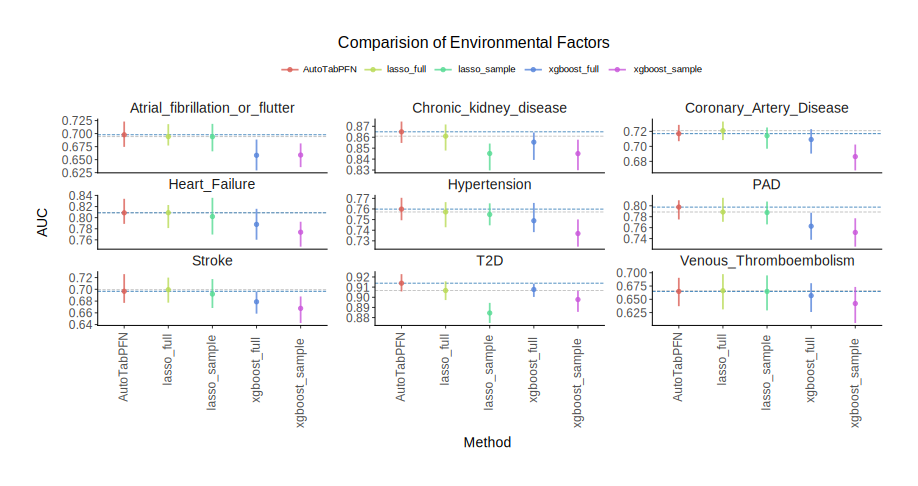

In [18]:
from plotnine import * 
p = (
    ggplot(
        data=res_df,
        mapping=aes(x="method", y="AUC", color="method"),
    )
    + facet_wrap("disease", scales="free_y")
    + geom_hline(
        data=res_df.query("method == 'lasso_full'"),
        mapping=aes(yintercept="AUC"),
        linetype="dashed",  # shixian
        color="#bebebe",
    )
    + geom_hline(
        data=res_df.query("method == 'AutoTabPFN'"),
        mapping=aes(yintercept="AUC"),
        linetype="dashed",
        color="#377eb8",
    )
    # + geom_hline(
    #     yintercept=0.5,
    #     linetype="dashed",
    #     color="black",
    # )
    + geom_point(alpha=0.8, size=2, position=position_dodge(width=0.3), na_rm=True)
    # + geom_jitter(width=0.1, height=0.1)
    + geom_linerange(
        mapping=aes(ymin="AUC_LCI", ymax="AUC_UCI"),
        size=1,
        alpha=0.8,
        position=position_dodge(width=0.3),
        na_rm=True,
    )
    + theme_classic(
        # base_family="Calibri",
                    base_size=12)  # 使用Tufte主题
    + theme(axis_line=element_line())
    + theme(
        figure_size=(12, 6),
        legend_position="top",
        axis_text_x=element_text(angle=90),
        strip_background=element_blank(),
        axis_text=element_text(size=12),  # 调整轴文字大小
        axis_title=element_text(size=14),  # 调整轴标题大小和样式
        legend_title=element_text(size=14),  # 调整图例标题大小和样式
        legend_text=element_text(),  # 调整图例文字大小
        strip_text=element_text(size=14),  # 调整分面标签的大小和样式
        plot_title=element_text(size=16, hjust=0.5),  # 添加图表标题并居中
        # plot_margin = margin(10, 10, 10, 10)  # 设置图表边距
    )
    + guides(color=guide_legend(nrow=1, title=""))
    # + scale_color_manual(
    #     values=color_dict,
    # )
    + labs(
        x="Method",  # 设置X轴标签
        y="AUC",  # 设置Y轴标签
        # color="group",  # 设置图例标题
        title="Comparision of Environmental Factors",  # 添加图表标题
    )
    # + coord_flip()
)
# print(p)
p